# Assignment 1


You must submit your notebook by running `python3 -m autograder.cli.submission.submit Assignment1.ipynb` from your local repository.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. To do so, restart the kernel and run all cells (in the menubar, select Runtime→→Restart and run all).

#### Show your work!
Whenever you are asked to find the solution to a problem, be sure to also **show how you arrived** at your answer.

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWERS HERE", as well as your name below:


In [61]:
NAME = "Inje Kim"
STUDENT_ID = "2087134"

## Q1

![figure](https://docs.google.com/drawings/d/e/2PACX-1vR3cNeZWfHNbPXRGyZrKazhI2WNM9wroJoAsshbD7LzwEBd4k0W_zu-T30_O_4iHC2qpKRxCRBA1IjV/pub?w=480&h=320)

Which solution would the following search algorithms find to move from node *Start* to node *Goal* if run the algorithm on the search graph above? Break any ties alphabetically. Please give each answer in a form similar to this example: `[start, 'a', 'd', goal]`

a. Breadth-First Search

b. Depth-First Search

c. Uniform Cost Search

Explain by drawing an equivalent search tree for each of them. Draw the search trees graphically. A good way to do this is through [Google Drawings](https://docs.google.com/drawings)



In [62]:
# YOUR ANSWERS HERE
def question1():
    """
    Description:
    [Enter a description of your reasoning for each of a through c here.]
    """
    start = 'Start'
    goal = 'Goal'
    
    a = [start, 'd', goal]
    b = [start, 'a', 'b', 'c', goal]
    c = [start, 'a', 'b', goal]
    
    return a, b, c

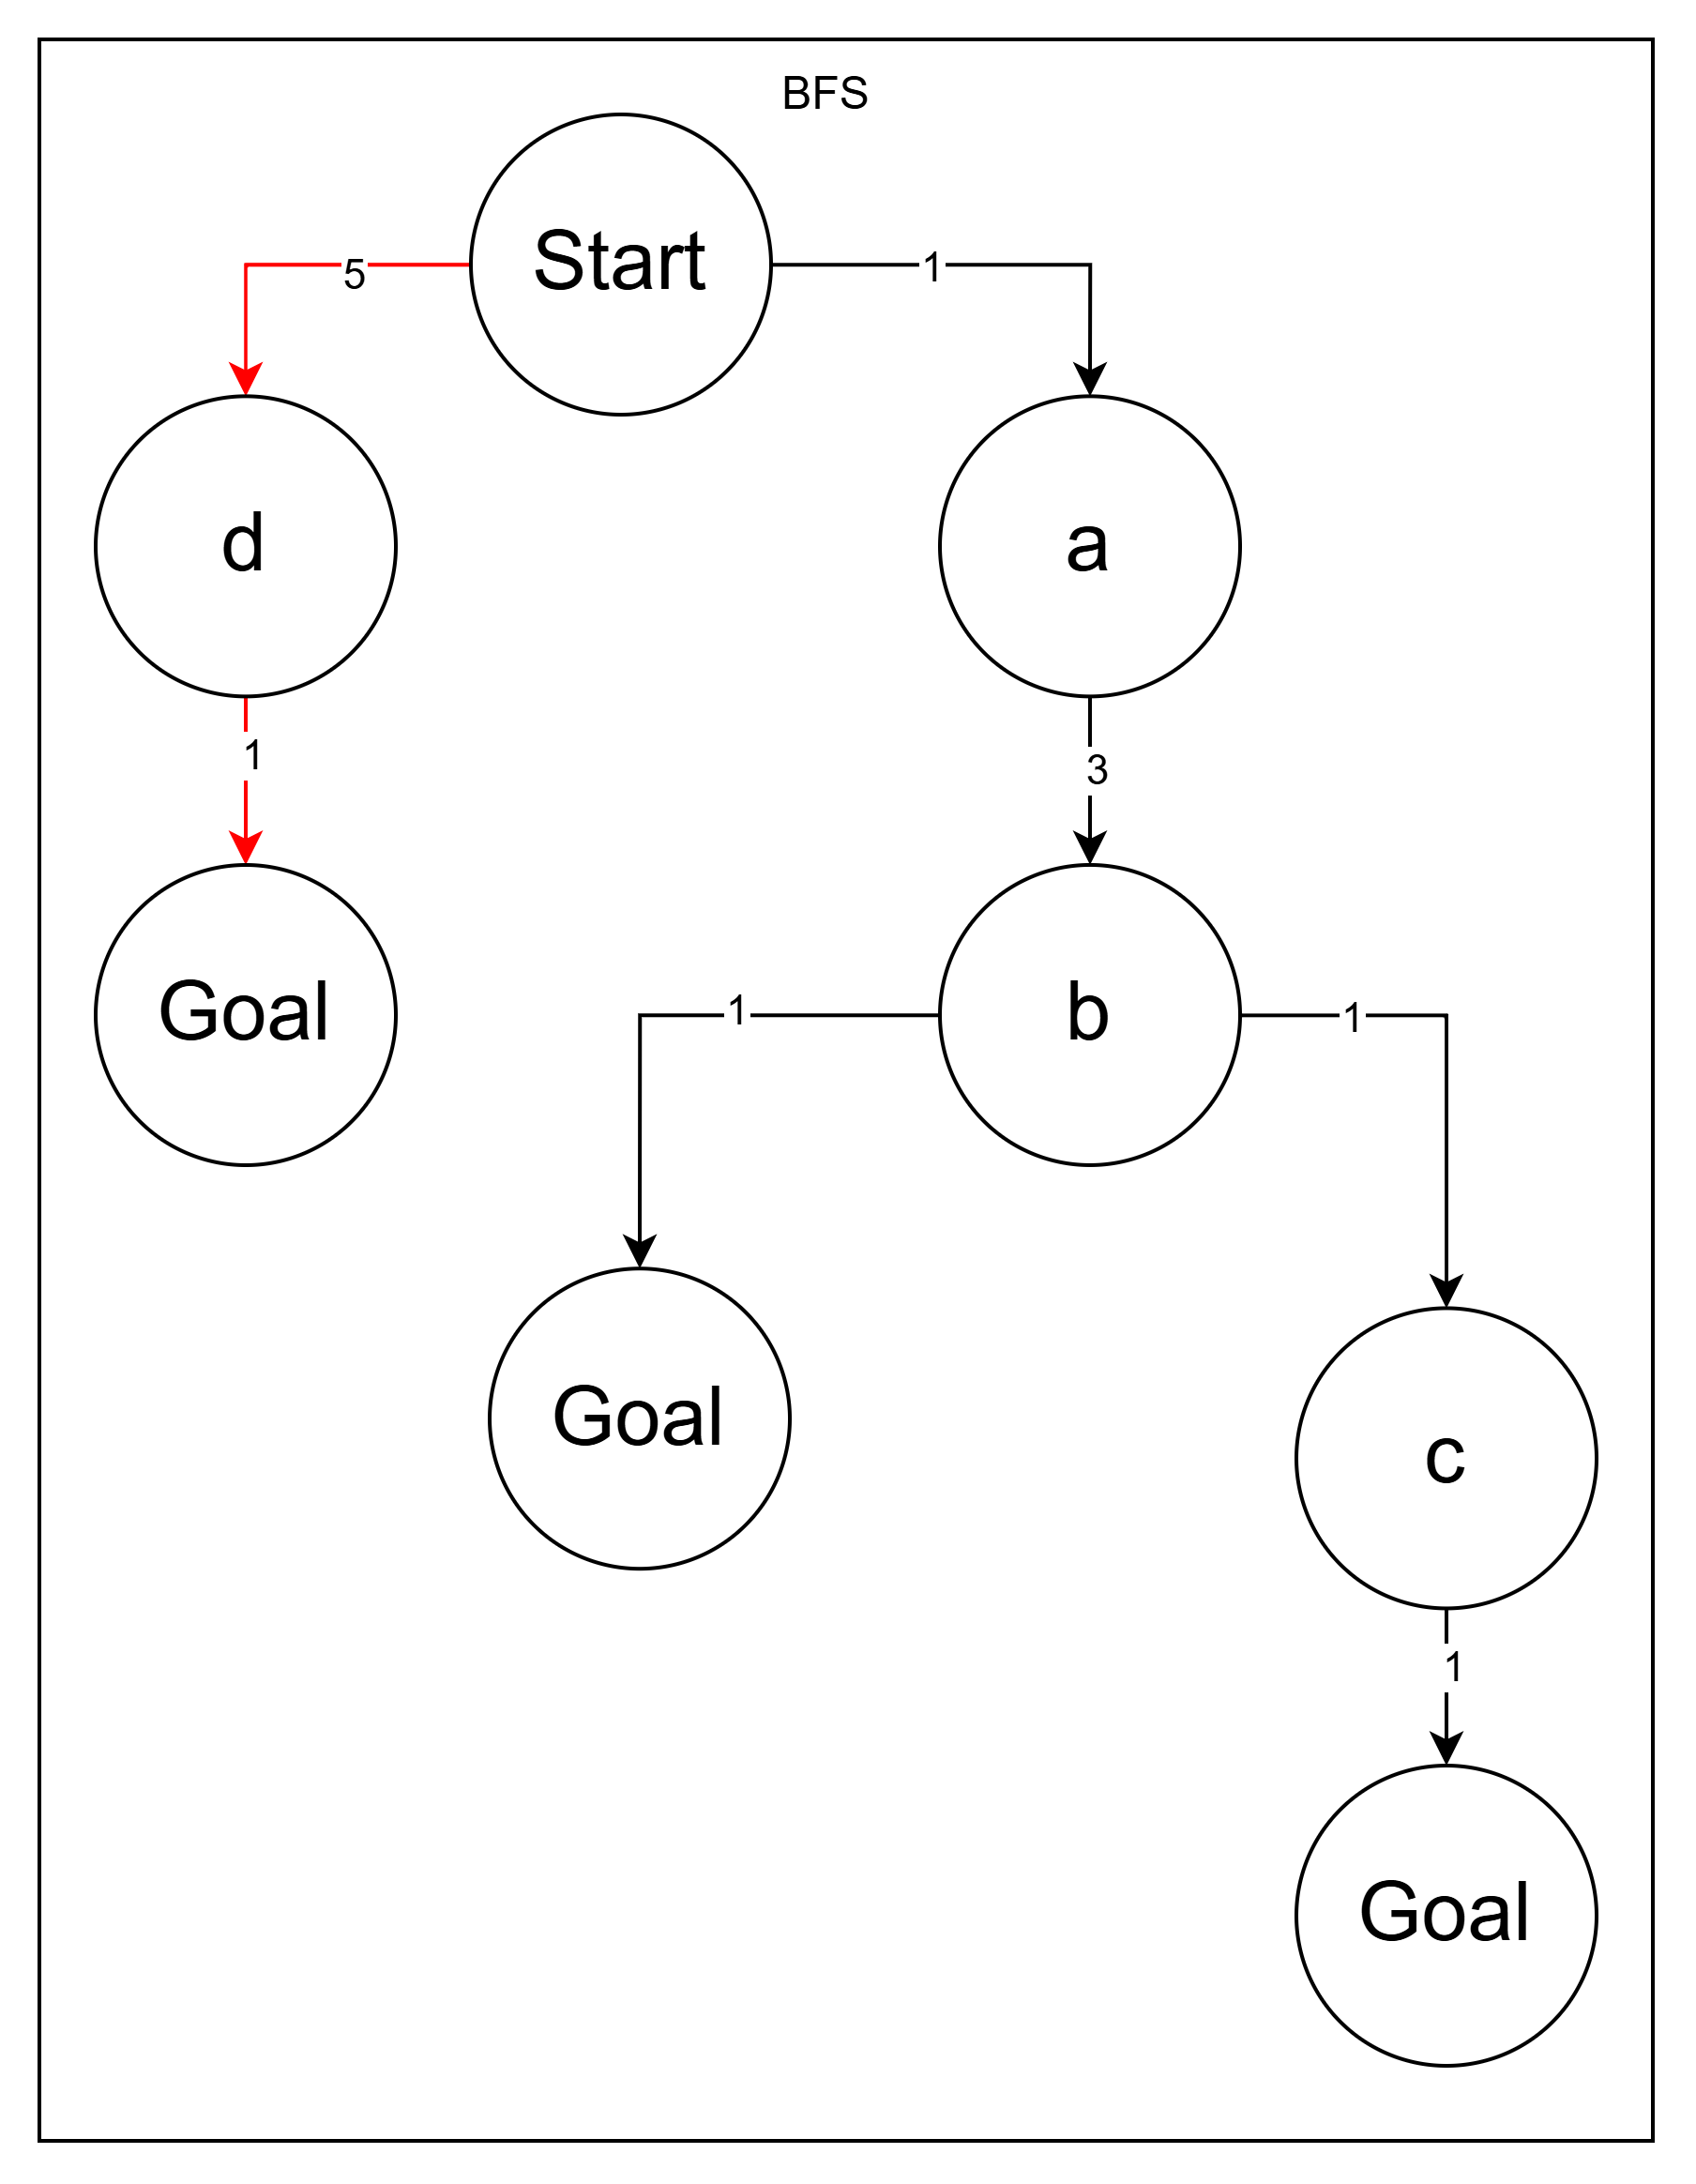

In [63]:
from IPython import display

display.Image("figs/bfs.png", width=300)

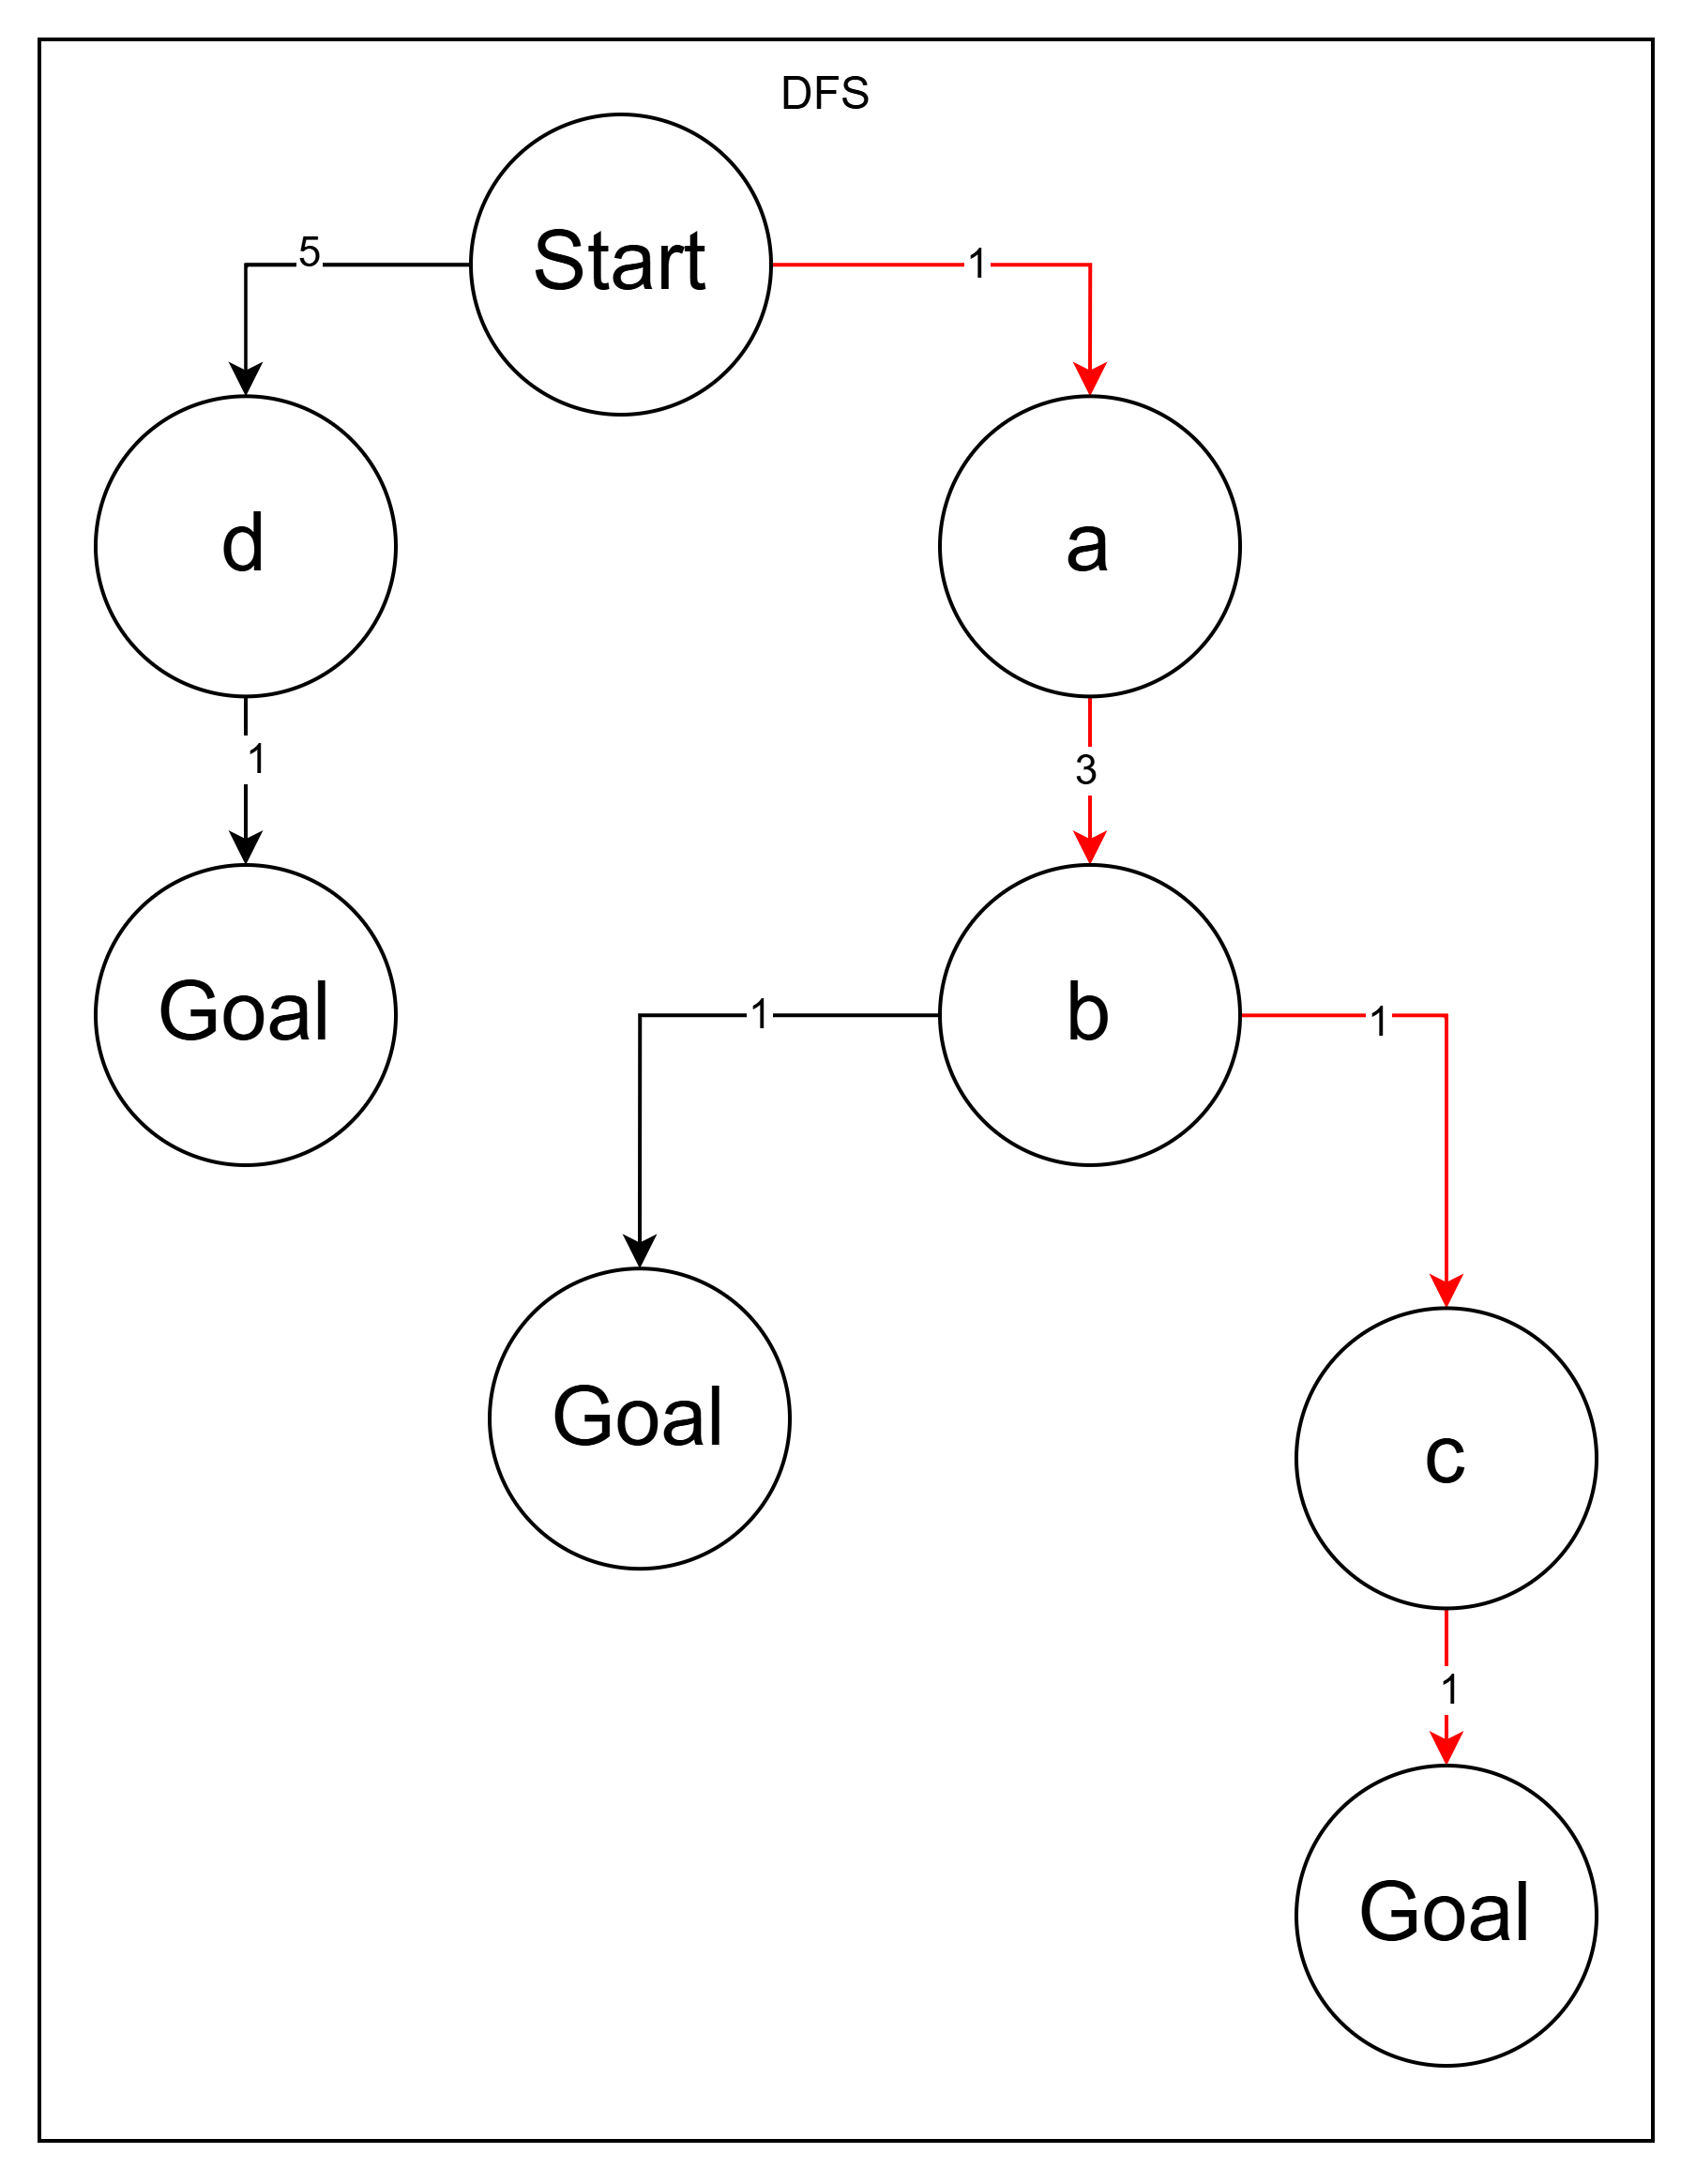

In [64]:
display.Image("figs/dfs.png", width=300)

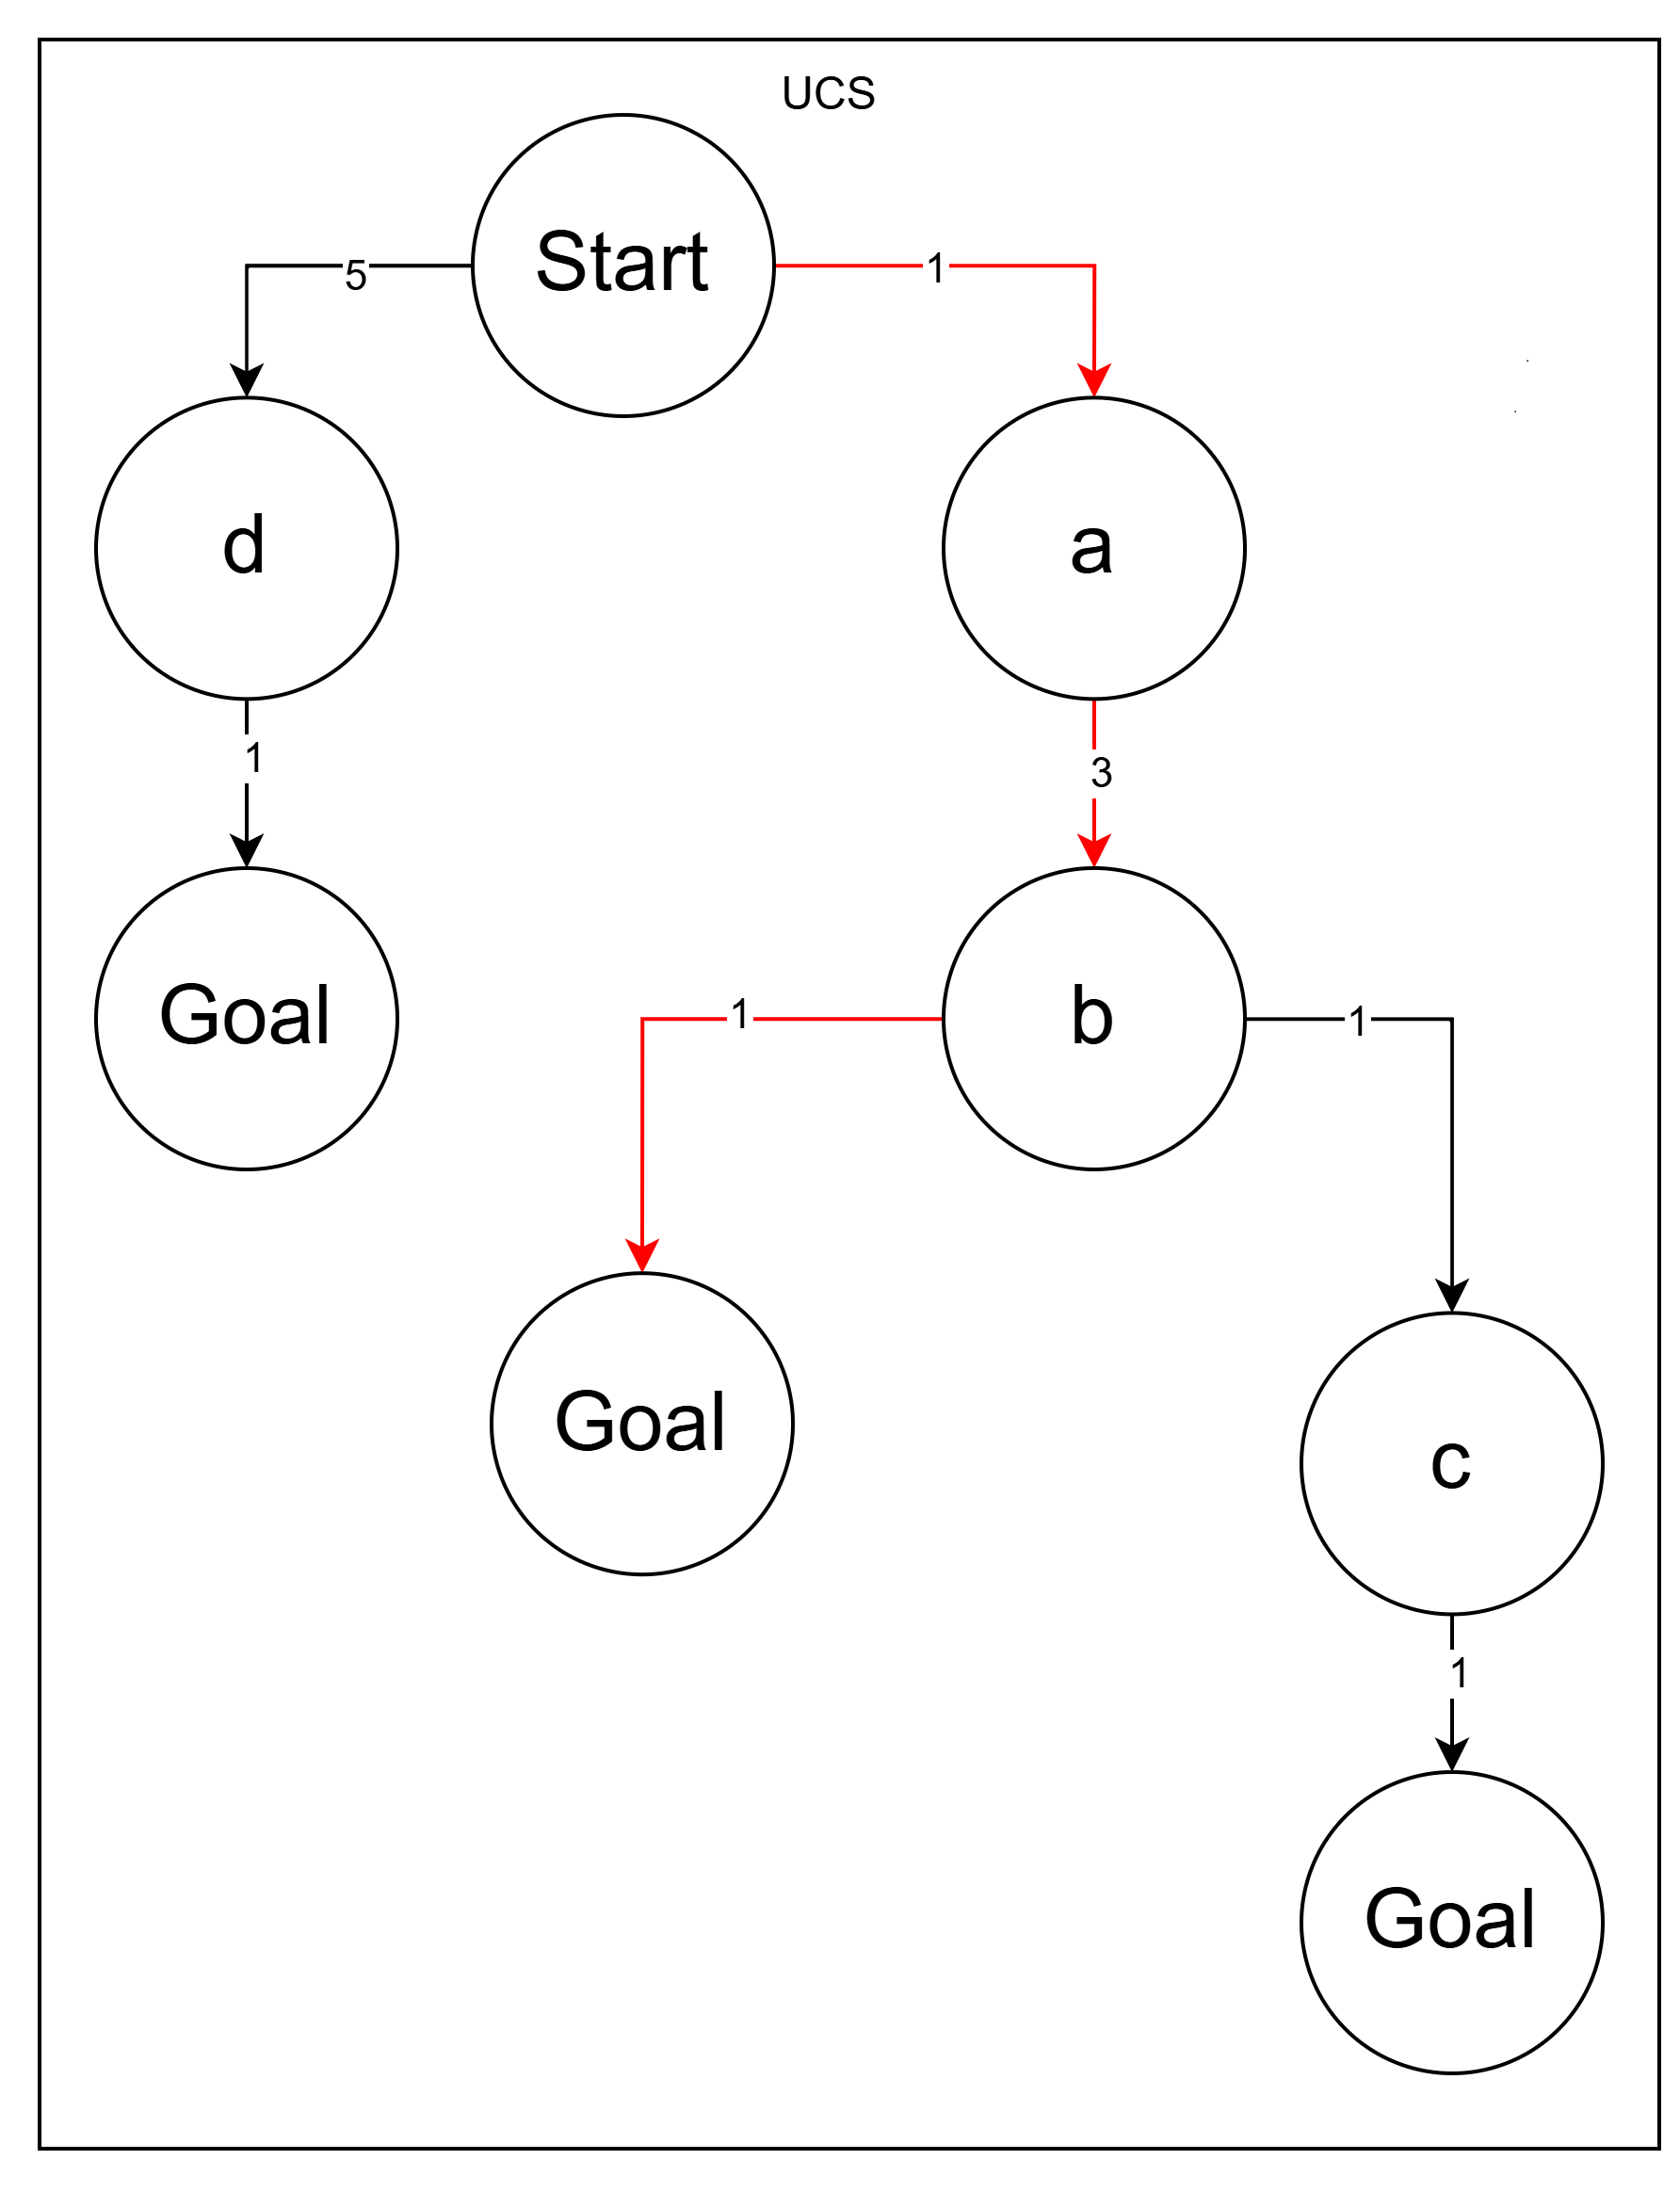

In [65]:
display.Image("figs/ucs.png", width=300)

## Q2
Answer the following questions about the search problem shown in the figure below. Break any ties alphabetically. For the questions that ask for a path, please give your answers in a form similar to this example: `[start, 'a', 'd', goal]`. For questions `e` and `f`, please return either `True` or `False`.

Start − a − d − Goal

![figure](https://docs.google.com/drawings/d/e/2PACX-1vS4nUoOVGzXNZTHZLsY6wZ6VyjtPlA4mhcvWs-6mgwaeDwoMftqbYyytgBVmgOnqLoUGZbRt8cuQNfA/pub?w=640&h=480)

What path would be returned for this search problem using each of the following graph search algorithms?

a. Breadth-First Search

b. Uniform Cost Search

c. Depth-First Search

d. A* Search (using an appropriate heuristic function). Explain what heuristc function you used.



Consider the heuristics for this problem shown in the table below.

|     State     |     h1     |     h2        |
|---------------|------------|---------------|
|     start     |     5      |     4         |
|     a         |     3      |     2         |
|     b         |     6      |     6         |
|     c         |     2      |     1         |
|     d         |     3      |     3         |
|     goal      |     0      |     0         |


e. Is h1 consistent?

f. Is h2 consistent?

In [66]:
# YOUR ANSWERS HERE
def question2():
    """
    Description:
    [Enter a description of your reasoning for each of a through f here.]
    """
    start = 'Start'
    goal = 'Goal'
    
    a = [start, goal] 
    b = [start, 'a', 'c', goal]
    c = [start, 'a', 'b', 'd', goal]
    d = [start, 'a', 'c', goal]
    e = False
    f = False
    
    return a, b, c, d, e, f

## Chess 
The remaining questions in this assignment, as well as all the questions in the following assignment, will make use of Python's chess module.

If you're not familiar with this, it would probably be beneficial to spend some time going over it before getting started with the rest of the assignment. The official documentation is one place to get started: `https://python-chess.readthedocs.io/en/latest/`


## The Knight Errant Problem
The knight begins their quest in the bottom left-hand corner of the board, the tile 'A1'. Their quest will end when they reach the upper right-hand corner of the board, the tile 'H8'. Along the way, the knight will pass through many other tiles on the board. 

For each of the following questions, implement the corresponding search algorithm and return the list of tiles visited, in order. In Python's chess module, each tile has an integer id corresponding to it, where `'A1' = 0`, `'A2' = 1`, etc, and they are really just treated as integers by the chess module. Each chess square is equivalent to a number ranging from `0` to `63`, going from left to right, one row at at a time.

For example, the knight starting on tile `'A1' = 0` and moving through tiles `'A1' = 0`, `'B3' = 17`, and `'D2' = 11`, in that order, before finally reaching the destination `'F1' = 5` would be represented by the list `[0, 17, 11, 5]`. Please note, this conversion from `A1` to `0` happens automatically, so please just don't be confused if you added a chess Tile to your list and saw it as an integer when you print it out; it is really the same thing.

As one final piece of advice, it is not necessary to invent any grand new functions here to help you interface with the chess board. If you have an idea for something and it seems like too much, there may very well be a built-in chess module function that can do it for you. Please have a look before diving in head-first.

A function to check whether a given board meets the goal condition is provided here for you below:

In [67]:
import chess

def goal_reached(board: chess.Board, goal_position: chess.Square):
    """
    This function informs us as to whether the goal condition has been met during our search

    Parameters:
    - board: the chess board that the knight is moving upon

    Returns:
    - True: if the knight is on the destination tile 'H8'
    - False: otherwise
    """
    p = board.piece_at(goal_position)
    return p and p.piece_type == chess.KNIGHT and p.color == chess.WHITE

## Q3
Implement the **Breadth-First Search** (BFS) algorithm to find the order of **expanded** tiles (not the final path) for the the Knight Errant Problem.

Break ties in the order given by `board.legal_moves`. Please give your answer in a form similar to this example: `[0, 31, 15, ..., 63]`

In [68]:
def BFS(board: chess.Board, goal_position: chess.Square):
    """
    This function implements the breath first search algorithm
    
    Parameters:
    - board: the chess board that the knight is moving upon
    
    Returns:
    A list containing the visited tile values in the order they were visited with starting tile
    always being the first tile and the goal tile always being the last tile
    """
    visited_nodes_in_order = []
    
    # YOUR CODE HERE
    from collections import deque
    
    start_squares = board.pieces(chess.KNIGHT, chess.WHITE)
    if not start_squares:
        return visited_nodes_in_order  # No knight to move
    starting_square = start_squares.pop()

    queue = deque()
    queue.append((board.copy(), starting_square))

    visited_squares = set()

    while queue:
        current_board, current_square = queue.popleft()

        if current_square in visited_squares:
            continue

        visited_squares.add(current_square)
        visited_nodes_in_order.append(current_square)

        if current_square == goal_position:
            return visited_nodes_in_order

        current_board.turn = chess.WHITE

        for move in current_board.legal_moves:
            if move.from_square == current_square:
                if move.to_square not in visited_squares:
                    copy_board = current_board.copy()
                    copy_board.push(move)
                    # Ensure it's white's turn after the move
                    copy_board.turn = chess.WHITE
                    queue.append((copy_board, move.to_square))
                    
    return visited_nodes_in_order


In [69]:
test_board = chess.Board("8/8/8/8/8/8/8/N7")
test_goal = chess.H8
print(test_board)

q3 = BFS(test_board, test_goal)
print(q3)

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . . . .
[0, 17, 10, 34, 32, 27, 11, 2, 25, 20, 16, 4, 51, 49, 44, 40, 28, 24, 19, 42, 26, 37, 33, 21, 12, 5, 1, 8, 35, 30, 14, 3, 61, 57, 45, 41, 36, 59, 43, 54, 50, 38, 29, 22, 18, 13, 9, 52, 48, 47, 31, 15, 6, 55, 46, 62, 60, 39, 58, 56, 53, 23, 7, 63]


## Q4
Implement the **Depth-First Search** (DFS) algorithm to find the order of **expanded** tiles (not the final path) for the the Knight Errant Problem.

Break ties in the order given by `board.legal_moves`. Please give your answer in a form similar to this example: `[0, 31, 15, ..., 63]`

In [70]:
def DFS(board: chess.Board, goal_position: chess.Square):
    """
    This function implements the depth first search algorithm
    
    Parameters:
    - board: the chess board that the knight is moving upon
    
    Returns:
    A list containing the visited tile values in the order they were visited with starting tile
    always being the first tile and the goal tile always being the last tile
    """
    visited_nodes_in_order = []
    
    # YOUR CODE HERE
    start_squares = board.pieces(chess.KNIGHT, chess.WHITE)
    if not start_squares:
        return visited_nodes_in_order  # No knight to move
    starting_square = start_squares.pop()

    stack = []
    stack.append((board.copy(), starting_square))

    visited_squares = set()

    while stack:
        current_board, current_square = stack.pop()

        if current_square in visited_squares:
            continue

        visited_squares.add(current_square)
        visited_nodes_in_order.append(current_square)

        if current_square == goal_position:
            return visited_nodes_in_order

        current_board.turn = chess.WHITE

        all_moves = list(current_board.legal_moves)

        moves_from_current = [move for move in all_moves if move.from_square == current_square]

        for move in reversed(moves_from_current):
            if move.to_square not in visited_squares:
                copy_board = current_board.copy()
                copy_board.push(move)
                # Ensure it's white's turn after the move
                copy_board.turn = chess.WHITE
                stack.append((copy_board, move.to_square))

    return visited_nodes_in_order


In [71]:
test_board = chess.Board("8/8/8/8/8/8/8/N7")
test_goal = chess.H8
print(test_board)

q4 = DFS(test_board, test_goal)
print(q4)

. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . . . .
[0, 17, 34, 51, 61, 55, 45, 62, 52, 58, 48, 42, 59, 53, 63]


## Q5
Implement the **A* Search** (Textbook Section 3.5.2) algorithm to find the **final path found** for the Knight Errant Problem.

#### A* Search
---
The most widely known form of best-first search is called **A∗ search** (pronounced "A-star search"). It evaluates nodes by combining $g(n)$, the cost to reach the node, and $h(n)$, the cost to get from the node to the goal:

\begin{equation*}
f(n) = g(n) + h(n) .
\end{equation*}

Since $g(n)$ gives the path cost from the start node to node $n$, and $h(n)$ is the estimated cost of the cheapest path from n to the goal, we have


$f(n)$= estimated cost of the cheapest solution through $n$ .

**NOTE:**
- If two positions are considered equally good choices, take the node that appears first in board.legal_moves
- You may also find the built-in function `chess.square_knight_distance(a, b)` useful here


In [72]:
def a_star_search(board: chess.Board, goal_position: chess.Square):
    """
    This function implements the A* search algorithm

    Parameters:
    - board: the chess board that the knight is moving upon

    Returns:
    A list containing the final path returned by A*, starting with the start tile's ID and ending with the goal tile's ID.
    """
    optimal_path = []
    
    # YOUR CODE HERE
    import heapq
    start_squares = board.pieces(chess.KNIGHT, chess.WHITE)
    if not start_squares:
        return optimal_path  # No knight to move
    start_square = start_squares.pop()

    open_list = []
    closed_set = set()

    g_score = {start_square: 0}
    h = chess.square_knight_distance(start_square, goal_position)
    f = g_score[start_square] + h

    tie_breaker_counter = 0

    heapq.heappush(open_list, (f, tie_breaker_counter, start_square))

    came_from = {}

    while open_list:
        current_f, current_tie_breaker, current_square = heapq.heappop(open_list)

        if current_square == goal_position:
            # Reconstruct the path
            optimal_path = []
            while current_square in came_from:
                optimal_path.append(current_square)
                current_square = came_from[current_square]
            optimal_path.append(start_square)
            optimal_path.reverse()
            break

        if current_square in closed_set:
            continue
        closed_set.add(current_square)

        current_board = chess.Board()
        current_board.clear()
        current_board.set_piece_at(current_square, chess.Piece(chess.KNIGHT, chess.WHITE))
        current_board.turn = chess.WHITE

        legal_moves = list(current_board.legal_moves)

        for idx, move in enumerate(legal_moves):
            if move.from_square != current_square:
                continue  # Ignore moves not from the current square

            neighbor_square = move.to_square
            tentative_g_score = g_score[current_square] + 1  # Each move costs 1

            if neighbor_square in g_score and tentative_g_score >= g_score[neighbor_square]:
                continue  # Not a better path

            came_from[neighbor_square] = current_square
            g_score[neighbor_square] = tentative_g_score
            h = chess.square_knight_distance(neighbor_square, goal_position)
            f = tentative_g_score + h

            tie_breaker = idx  # Use the index in legal_moves as the tie-breaker

            heapq.heappush(open_list, (f, tie_breaker, neighbor_square))
    
    return optimal_path


In [73]:
test_board = chess.Board("8/8/8/8/8/8/8/N7")
test_goal = chess.H8
print(test_board)

q5 = a_star_search(test_board, test_goal)
print(q5)


. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . . . .
[0, 10, 25, 42, 59, 53, 63]
